In [32]:
from google.colab import files
import pandas as pd
import io
uploaded= files.upload() #loading the dataset from the local system

Saving heart.csv to heart (1).csv


In [33]:
data = uploaded["heart.csv"].decode("utf-8").split("\r\n")

for i in range(len(data)):
  data[i] = data[i].split(",")

data=pd.DataFrame(data)


In [34]:
data #uploaded data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,﻿age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
302,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
303,57,0,1,130,236,0,0,174,0,0,1,1,2,0


In [35]:
data=data.drop([304,0]) # removing unwanted rows

**Correlation between target and other columns**

In [ ]:
for i in range(0,14):
  print(data.iloc[:,i].astype('float32').corr(data.iloc[:,13].astype('float32')))

-0.22543871587483688
-0.2809365755017664
0.4337982615068916
-0.1449311284977513
-0.08523910513756881
-0.028045760272712814
0.13722950287377317
0.42174093381067385
-0.43675708335329955
-0.43069600300620975
0.34587707824172226
-0.3917239923512517
-0.3440292680383096
1.0


**Dividing dataset into input and output form**

In [92]:
data = data.sample(frac=1).reset_index(drop=True)
Y=data.iloc[0:,13]
input_data=data.drop(13,axis=1)


**Converting multiclass problem into binary**

In [93]:
Y=Y.replace(to_replace=['1','2','3','4'],value='1') 

**Input data description**

In [ ]:
input_data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,303,303,303,303,303,303,303,303,303,303,303,303,303
unique,41,2,4,49,152,2,3,91,2,40,3,5,4
top,58,1,0,120,197,0,1,162,0,0,2,0,2
freq,19,207,143,37,6,258,152,11,204,99,142,175,166


**Output data description**

In [ ]:
Y.describe()

count     303
unique      2
top         1
freq      165
Name: 13, dtype: object

**Dividing data into train and test set**

In [94]:
train_threshold= int(303*70/100)
input_train=input_data.iloc[0:train_threshold,:]
predict_train=Y[0:train_threshold]
input_test= input_data.iloc[train_threshold:304,:]
predict_test= Y[train_threshold:304]


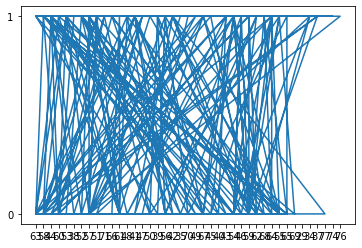

In [ ]:
import matplotlib.pyplot as plt  #plotting graph between output and age column of input
plt.plot(input_data.iloc[:,0],Y)

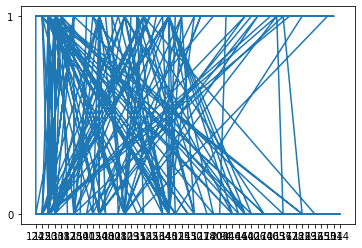

In [ ]:
plt.plot(input_data.iloc[:,3],Y)


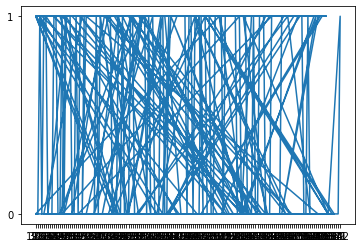

In [ ]:
plt.plot(input_data.iloc[:,4],Y)


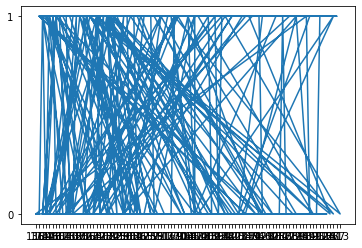

In [ ]:
plt.plot(input_data.iloc[:,7],Y)


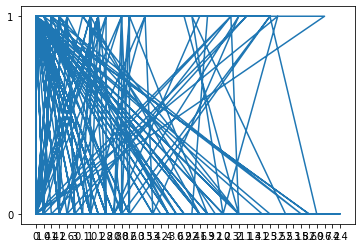

In [ ]:
plt.plot(input_data.iloc[:,9],Y)

**KNN**

In [ ]:
#Importing the required modules
import numpy as np
from scipy.stats import mode
 
#Euclidean Distance
def eucledian(p1,p2):
    dist = np.sqrt(np.sum((p1-p2)**2))
    return dist
 
#Function to calculate KNN
def predict(x_train, y , x_input, k):
    op_labels = []
     
    #Loop through the Datapoints to be classified
    for item in range(len(x_input)): 
         
        #Array to store distances
        point_dist = []
         
        #Loop through each training Data
        for j in range(len(x_train)): 
            distances = eucledian(np.array(x_train.iloc[j,:]) , x_input.iloc[item,:]) 
            #Calculating the distance
            point_dist.append(distances) 
        point_dist = np.array(point_dist)
         
        #Sorting the array while preserving the index
        #Keeping the first K datapoints
        dist = np.argsort(point_dist)[:k] 
         
        #Labels of the K datapoints from above
        labels = y[dist]
         
        #Majority voting
        lab = mode(labels) 
        lab = lab.mode[0]
        op_labels.append(lab)
 
    return op_labels

In [ ]:
#Importing the required modules
#Importing required modules
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from numpy.random import randint
 
#Applying our function 
y_pred_knn = predict(input_train.astype("float32"),predict_train.astype("int"),input_test.astype("float32") , 5)  
 
#Checking the accuracy
accuracy_score(predict_test.astype('int'), y_pred_knn)

0.7032967032967034

In [ ]:
import sklearn
sklearn.metrics.confusion_matrix(predict_test.astype('int'), y_pred_knn)

array([[25, 16],
       [18, 32]])

**SVM**

In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(input_train,predict_train)

Y_pred_svm = sv.predict(input_test)

In [ ]:
from sklearn.metrics import accuracy_score
score_svm = round(accuracy_score(Y_pred_svm,predict_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 84.62 %


In [ ]:
import sklearn
sklearn.metrics.confusion_matrix(predict_test, Y_pred_svm)


array([[30, 11],
       [ 3, 47]])

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(input_train,predict_train)

Y_pred_nb = nb.predict(input_test)
score_nb = round(accuracy_score(Y_pred_nb,predict_test)*100,2)

print(score_nb)

83.52


In [ ]:
import sklearn
sklearn.metrics.confusion_matrix(predict_test, Y_pred_nb)

array([[32,  9],
       [ 6, 44]])

**Random Forest**

In [114]:
from sklearn.ensemble import RandomForestClassifier
l=[]
for x in range(100,1000,100):
 clf = RandomForestClassifier(n_estimators = x)  
  
 # Training the model on the training dataset
 # fit function is used to train the model using the training sets as parameters
 clf.fit(input_train, predict_train)
  
 # performing predictions on the test dataset
 y_pred = clf.predict(input_test)
 l.append(accuracy_score(y_pred,predict_test))
print(l)
print(max(l)) #max accuracy

[0.8241758241758241, 0.8241758241758241, 0.8351648351648352, 0.8351648351648352, 0.8241758241758241, 0.8241758241758241, 0.8241758241758241, 0.8351648351648352, 0.8241758241758241]
0.8351648351648352


In [116]:
# Value of n is 300 from above result
clf = RandomForestClassifier(n_estimators =300)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(input_train, predict_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(input_test)

In [117]:
import sklearn
sklearn.metrics.confusion_matrix(predict_test, y_pred)

array([[30, 12],
       [ 4, 45]])

** 3 Layered Neural Network**

In [110]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(input_train.astype('float32'),predict_train.astype('float32'), validation_data=(input_test.astype('float32'),predict_test.astype('float32')),epochs=300,batch_size=10)

Epoch 1/300
22/22 [==============================] - 1s 14ms/step - loss: 19.9458 - accuracy: 0.5496 - val_loss: 14.1182 - val_accuracy: 0.5275
Epoch 2/300
22/22 [==============================] - 0s 5ms/step - loss: 10.7605 - accuracy: 0.5292 - val_loss: 5.3983 - val_accuracy: 0.4505
Epoch 3/300
22/22 [==============================] - 0s 5ms/step - loss: 4.3423 - accuracy: 0.4167 - val_loss: 4.0235 - val_accuracy: 0.4176
Epoch 4/300
22/22 [==============================] - 0s 5ms/step - loss: 4.2503 - accuracy: 0.3956 - val_loss: 3.5744 - val_accuracy: 0.3956
Epoch 5/300
22/22 [==============================] - 0s 6ms/step - loss: 3.7422 - accuracy: 0.3892 - val_loss: 3.1794 - val_accuracy: 0.4066
Epoch 6/300
22/22 [==============================] - 0s 4ms/step - loss: 3.4886 - accuracy: 0.3983 - val_loss: 2.9582 - val_accuracy: 0.3736
Epoch 7/300
22/22 [==============================] - 0s 4ms/step - loss: 3.1951 - accuracy: 0.3663 - val_loss: 2.6856 - val_accuracy: 0.3956
Epoch 8/3

**SVM POLY and RBF**

In [95]:
from sklearn import svm

sv = svm.SVC(kernel='poly')

sv.fit(input_train,predict_train)

Y_pred_svm = sv.predict(input_test)

In [96]:

score_svm = round(accuracy_score(Y_pred_svm,predict_test)*100,2)

print("The accuracy score achieved using poly NonLinear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using poly NonLinear SVM is: 64.84 %


In [97]:
sklearn.metrics.confusion_matrix(predict_test, Y_pred_svm)  #confusion matrix

array([[25, 17],
       [15, 34]])

In [98]:
from sklearn import svm

sv = svm.SVC(kernel='rbf')

sv.fit(input_train,predict_train)

Y_pred_svm = sv.predict(input_test)

In [99]:
from sklearn.metrics import accuracy_score
score_svm = round(accuracy_score(Y_pred_svm,predict_test)*100,2)

print("The accuracy score achieved using rbf NonLinear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using rbf NonLinear SVM is: 62.64 %


In [100]:
sklearn.metrics.confusion_matrix(predict_test, Y_pred_svm)  #confusion matrix

array([[19, 23],
       [11, 38]])